# Understanding our Generalization Bound
$$
% Full
%     \mathbb{P}\Biggl(
%         \sup_{f\in\mathcal{F}_{\rm L}} |\mathcal{R}_{G,x}(f) - \mathcal{R}^N_{G,x}(f)|
%         \le 
%         \frac{\sqrt{{\rm diam}(G)}}{\sqrt{N}} \left[
%         \left(1 + \sqrt{{\rm diam}(G)}\right)
%         \cdot \min\left\{
%             \frac{ \log_2(N)}{2},\ 
%             12k\,\sqrt{{\rm diam}(G)}
%         \right\}
%         + \sqrt{3\,  \log_2(2/\delta)}
%         \right]
%     \Biggr)
% \ge 
%     1- \delta
% Simplified
    \mathbb{P}\Biggl(
        \sup_{f\in\mathcal{F}_{\rm L}} |\mathcal{R}_{G,x}(f) - \mathcal{R}^N_{G,x}(f)|
        \le 
        \frac{\sqrt{2}}{\sqrt{N}} \left[
        \left(1 + \sqrt{2}\right)
        \cdot \min\left\{
            \frac{ \log_2(N)}{2},\ 
            12k\,\sqrt{2}
        \right\}
        + \sqrt{3\,  \log_2(2/\delta)}
        \right]
    \Biggr)
\ge 
    1- \frac{2}{N}
$$
where we have set $L_{\ell}=1$, $L=1/\sqrt{2}$ in Theorem 3.1, and ${\rm diam}(G)\le 2$, and we will often set $\delta= \frac1{100}$.

In this case, there are two learning curves:
 - Small-to-Moderate Sample-Size Regieme: 
 $$
 C_1(N) := \biggl(
 \frac{(1+\sqrt{2})}{\sqrt{2}} + \frac{\sqrt{3\log_2(
%  2/\delta
200
 )}}{\log_2(N)}
 \biggr)\frac{\log_2(N)}{\sqrt{N}}
 $$
 - Large Sample-Size Regieme $(2^{48 k}\le N)$: 
 $$
 C_2(N) := \biggl(
 24(1+\sqrt{2})k + \sqrt{6\log_2(
%  2/\delta
200
 )}
 \biggr)\frac{1}{\sqrt{N}}
 $$

## Hyper-Parameters

In [1]:
delta_fail = 1/10 # Failure Probability
k_nodes = 3 # Number of Nodes
# Sample Size Range
N_Min = 4*(10**0)
N_Max = 1*(10**3)

## Initializations

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.patches import Rectangle
import seaborn as sns

# Seaborn style
sns.set(style="whitegrid", context="talk", palette="deep")

## The ``slow'' learning curve 
for *Small-to-Moderate Sample-Sizes*
 $$
 C_1(N) := \biggl(
 \frac{(1+\sqrt{2})}{\sqrt{2}} + \frac{\sqrt{3\log_2(
%  2/\delta
200
 )}}{\log_2(N)}
 \biggr)\frac{\log_2(N)}{\sqrt{N}}
 $$

In [3]:
def slow_curve(N,delta=delta_fail):
    factor1 = (1+np.sqrt(2))/np.sqrt(2) + (np.sqrt(3*np.log2(2/delta)))/np.log2(N)
    rate = np.log2(N)/np.sqrt(N)
    return factor1*rate

## The ``fast'' learning curve 
for large Sample-Sizes: 
 $$
 C_2(N) := \biggl(
 24(1+\sqrt{2})k + \sqrt{6\log_2(
%  2/\delta
200
 )}
 \biggr)\frac{1}{\sqrt{N}}
 $$

In [4]:
def fast_curve(N, k=k_nodes, delta=delta_fail):
    factor1_1 = 24 * (1 + np.sqrt(2)) * k
    factor1_2 = np.sqrt(6 * np.log2(2 / delta))  # <-- corrected line
    factor1 = factor1_1 + factor1_2
    rate = 1 / np.sqrt(N)
    return factor1 * rate

## The True Learning Curve (Ours)
Adaptive to sample size regiemes
$$
C(N):= \min\{C_1(N),C_2(N)\}.
$$

In [5]:
def Our_curve(N,k=k_nodes,delta = delta_fail):
    return np.minimum(slow_curve(N),fast_curve(N,k=k_nodes,delta = delta_fail))

In [6]:
# print(slow_curve(np.array([100,1000])))
# print(fast_curve(np.array([100,1000])))
# print(Our_curve(np.array([100,1000])))

## Visualize Curves

/var/folders/px/t95mkn313fjb_vsv3__y1rjw0000gn/T/ipykernel_4742/1750894487.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


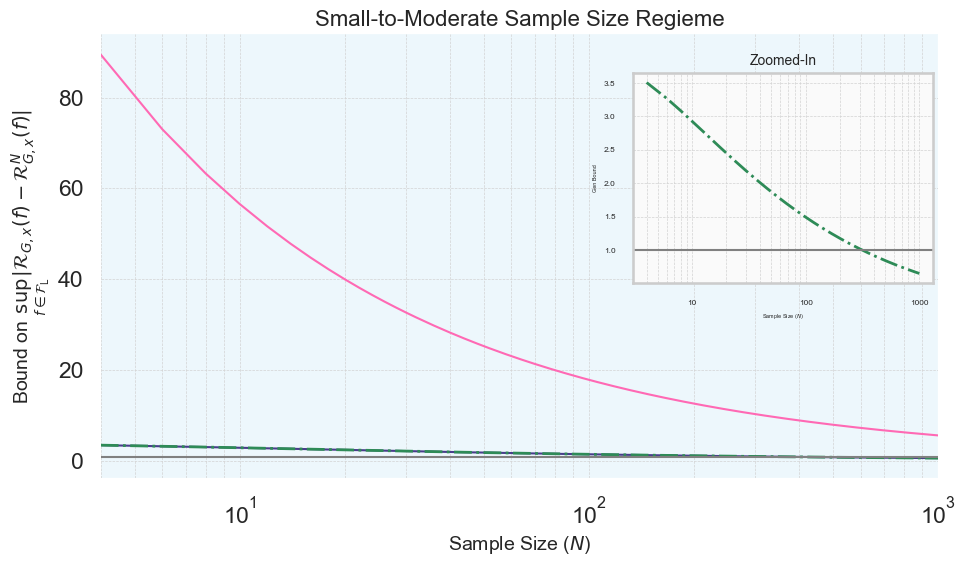

In [24]:
# Assume slow_curve, fast_curve, Our_curve are defined
# Assume N_Min and N_Max are defined

# Compute Range
N_vals = np.linspace(N_Min, N_Max, 500)

# Compute Curves
C_Slow = slow_curve(N_vals)
C_Fast = fast_curve(N_vals)
C_Ours = Our_curve(N_vals)

# Main plot
light_blue_bg = 'skyblue'
fig, ax = plt.subplots(figsize=(10, 6))

# Main plot
# Light blue background (semi-transparent)
ax.axvspan(np.min(N_vals), np.max(N_vals), facecolor='skyblue', alpha=0.15, zorder=0)


# Main learning curves
ax.plot(N_vals, C_Slow, linewidth=1.5, color='darkslateblue')
ax.plot(N_vals, C_Fast, linewidth=1.5, color='hotpink')
ax.plot(N_vals, C_Ours, linewidth=2, linestyle='-.', color='seagreen')

# Non-vacuous bound line
ax.plot(N_vals, np.ones_like(N_vals), color='grey', linestyle='-', linewidth=1.5)

# Aesthetics
ax.set_xscale('log')
ax.set_xlim(np.min(N_vals), np.max(N_vals))
ax.set_xlabel('Sample Size ($N$)', fontsize=14)
ax.set_ylabel(r'Bound on $\sup_{f\in\mathcal{F}_{\rm L}} |\mathcal{R}_{G,x}(f) - \mathcal{R}^N_{G,x}(f)|$', fontsize=14)
ax.set_title('Small-to-Moderate Sample Size Regieme', fontsize=16)

# Remove all spines
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

# Light dashed grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgrey')

# Inset plot with Seaborn grey style
with sns.axes_style("darkgrid", {
    "axes.facecolor": ".98", 
    "axes.edgecolor": ".8",
    "grid.color": ".9",
    "grid.linestyle": "--"
}):
    ax_inset = fig.add_axes([0.65, 0.50, 0.3, 0.35])  # [left, bottom, width, height]
    ax_inset.plot(N_vals, C_Ours, linewidth=2, linestyle='-.', color='seagreen')
    ax_inset.set_xscale('log')
    ax_inset.set_title('Zoomed-In', fontsize=10)
    ax_inset.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgrey')
#     ax_inset.set_xlim(N_Max / 10, N_Max)
#     ax_inset.set_ylim(min(C_Ours[-50:]) * 0.9, max(C_Ours[-50:]) * 1.1)
    # Non-vacuous bound line
    ax_inset.axhline(y=1, color='grey', linestyle='-', linewidth=1.5)

    # Tiny axis ticks
    ax_inset.tick_params(axis='both', which='major', labelsize=6)

    # Optionally use scalar formatter to reduce scientific notation clutter
    ax_inset.xaxis.set_major_formatter(ScalarFormatter())
    ax_inset.ticklabel_format(style='plain', axis='x')

    ax_inset.set_ylabel(r'Gen Bound', fontsize=4)
    ax_inset.set_xlabel('Sample Size ($N$)', fontsize=4)
#     ax_inset.tick_params(axis='x', labelbottom=False)


plt.tight_layout()
# ax.legend(loc='lower left', bbox_to_anchor=(0.02, 0.02))
fig.savefig('learning_curves__SmallModerate_Sample.pdf', bbox_inches='tight')
fig.savefig('learning_curves__SmallModerate_Sample.png', dpi=300, bbox_inches='tight')  # high-quality PNG (300 dpi)
plt.show()

## Large Sample Regime

In [8]:
# Large Sample Sizes
def compute_threshold_N(k=k_nodes, delta=1/200):
    A = 1 + np.sqrt(2)
    log_term = np.log2(2 / delta)
    B = np.sqrt(3 * log_term)
    C = np.sqrt(6 * log_term)

    exponent_threshold = np.sqrt(2) * (24 * k + (C - B) / A)
    N_threshold = int(np.ceil(2 ** exponent_threshold))
    return N_threshold

## Check when there is a changepoint
Change_Point = compute_threshold_N(); print(Change_Point)
N_large_Min = int(Change_Point*(2**(-3))); print(N_large_Min)
N_large_Max = int(Change_Point*(2**(3))); print(N_large_Max)

# Compute range
N_vals_Large = np.linspace(N_large_Min, N_large_Max, 500)

# Compute curves
C_Slow = slow_curve(N_vals_Large)
C_Fast = fast_curve(N_vals_Large)
C_Ours = Our_curve(N_vals_Large)

10564363840536263144254373625856
1320545480067032893031796703232
84514910724290105154034989006848


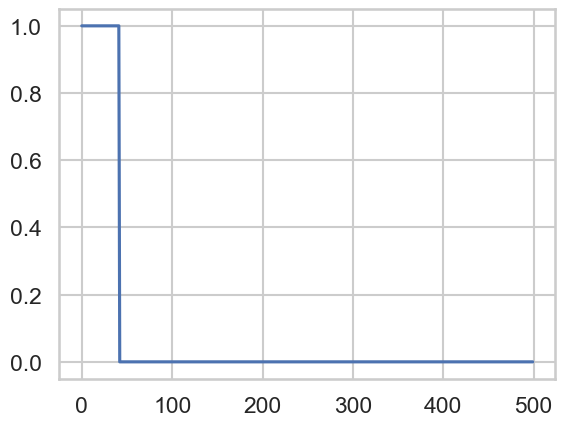

In [9]:
# Quick Check
plt.plot(C_Slow<=C_Fast)

### Log Scale on Generalization Bound

In [10]:
## Check when changepoint happens in machine precision
# Compute the absolute differences
diff = np.abs(C_Slow - C_Fast)
# Find the minimum difference value
min_diff = np.min(diff)
# Find the first index where the difference equals the minimum difference
ChangePoint_MachinePrecisionLocation = np.where(diff == min_diff)[0][0]
# Optionally, get the corresponding N value at that index
ChangePoint_MachinePrecision = N_vals_Large[ChangePoint_MachinePrecisionLocation]

/var/folders/px/t95mkn313fjb_vsv3__y1rjw0000gn/T/ipykernel_4742/580894025.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


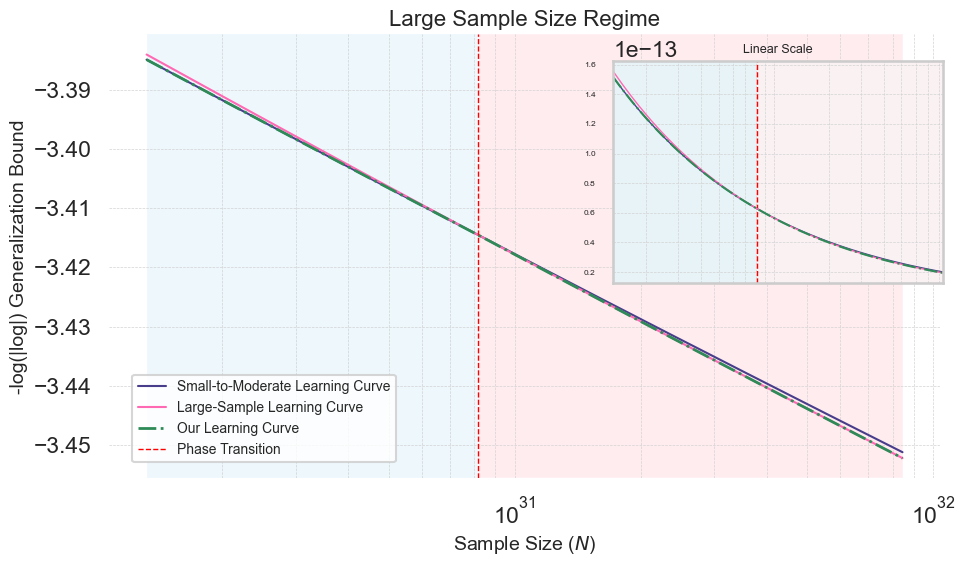

In [11]:
# --- MAIN PLOT: Log-Log View ---
fig, ax = plt.subplots(figsize=(10, 6))

# Background coloring before/after change point
ax.axvspan(N_large_Min, ChangePoint_MachinePrecision, facecolor='skyblue', alpha=0.15, zorder=0)
ax.axvspan(ChangePoint_MachinePrecision, np.max(N_vals_Large), facecolor='lightpink', alpha=0.25, zorder=0)

# Set explicit x limits to cover your spans nicely
ax_inset.set_xlim(float(N_large_Min), float(N_large_Max))

# Vertical line at change point
# ax.axvline(x=ChangePoint_MachinePrecision, color='red', linestyle='--', linewidth=1.5, label='Change Point')

# Plot log-log curves
ax.plot(N_vals_Large, -np.log(np.abs(np.log(C_Slow))), label='Small-to-Moderate Learning Curve', linewidth=1.5, color='darkslateblue')
ax.plot(N_vals_Large, -np.log(np.abs(np.log(C_Fast))), label='Large-Sample Learning Curve', linewidth=1.5, color='hotpink')
ax.plot(N_vals_Large, -np.log(np.abs(np.log(C_Ours))), label='Our Learning Curve', linewidth=2, linestyle='-.', color='seagreen')

# Vertical line inset
ax.axvline(x=ChangePoint_MachinePrecision, color='red', linestyle='--', linewidth=1,label='Phase Transition')

# Aesthetics
ax.set_xscale('log')
ax.set_xlabel('Sample Size ($N$)', fontsize=14)
ax.set_ylabel('-log(|log|) Generalization Bound', fontsize=14)
ax.set_title('Large Sample Size Regime', fontsize=16)
ax.legend(loc='lower left', bbox_to_anchor=(0.02, 0.02), fontsize=10)

# Clean main plot style
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgrey')

# --- INSET: Original Learning Curve ---
with sns.axes_style("darkgrid", {
    "axes.facecolor": ".98",
    "axes.edgecolor": ".8",
    "grid.color": ".9",
    "grid.linestyle": "--"
}):
    ax_inset = fig.add_axes([0.63, 0.50, 0.33, 0.37])  # [left, bottom, width, height]

    # Background color in inset
    ax_inset.axvspan(N_large_Min, ChangePoint_MachinePrecision, facecolor='skyblue', alpha=0.15, zorder=0)
    ax_inset.axvspan(ChangePoint_MachinePrecision, N_large_Max, facecolor='lightpink', alpha=0.12, zorder=0)

    # Vertical line inset
    ax_inset.axvline(x=ChangePoint_MachinePrecision, color='red', linestyle='--', linewidth=1)

    # Plot raw curves
    ax_inset.plot(N_vals_Large, C_Slow, linewidth=1.0, color='darkslateblue')
    ax_inset.plot(N_vals_Large, C_Fast, linewidth=1.0, color='hotpink')
    ax_inset.plot(N_vals_Large, C_Ours, linewidth=1.5, linestyle='-.', color='seagreen')

    ax_inset.set_xscale('log')
    ax_inset.set_xlim(float(N_large_Min), float(N_large_Max))
    ax_inset.xaxis.set_major_formatter(ScalarFormatter())
    ax_inset.ticklabel_format(style='plain', axis='x')

    ax_inset.set_title('Linear Scale', fontsize=9)
    ax_inset.tick_params(axis='y', labelsize=6)
    ax_inset.tick_params(axis='x', labelbottom=False)  # Hide x-axis labels

    ax_inset.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgrey')

plt.tight_layout()
fig.savefig('learning_curves__Large_Sample.pdf', bbox_inches='tight')
fig.savefig('learning_curves__Large_Sample.png', dpi=300, bbox_inches='tight')  # high-quality PNG (300 dpi)
plt.show()

---
# Fin 
---

---

---